In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('data/clean_data.csv')

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9729720,179000.0,4.0,1.0,1,1,3,1,0.0,63.0,...,0,0,0,0,0,0,0,0,1.0,0
1,9729785,255000.0,4.0,1.0,1,1,2,1,0.0,42.0,...,0,0,0,0,0,0,0,0,1.0,0
2,9729784,255000.0,4.0,1.0,1,1,2,1,0.0,42.0,...,0,0,0,0,0,0,0,0,1.0,0
3,9729780,620000.0,4.0,1.0,3,1,2,1,0.0,150.0,...,0,0,0,0,0,0,0,0,1.0,0
4,9727201,379000.0,4.0,2.0,2,0,3,0,0.0,120.0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,9463953,204760.0,2.0,0.0,1,0,3,1,0.0,95.0,...,0,0,0,0,0,0,0,0,0.0,0
11876,7770552,132000.0,6.0,0.0,1,0,3,1,0.0,95.0,...,0,0,0,0,0,0,0,0,0.0,0
11877,7770553,177000.0,6.0,0.0,1,0,3,1,0.0,95.0,...,0,0,0,0,0,0,0,0,1.0,0
11878,7770551,190000.0,6.0,0.0,2,0,3,1,0.0,95.0,...,0,0,0,0,0,0,0,0,1.0,0


In [3]:
df = df.drop(columns='Immoweb ID')

df

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Property type_APARTMENT,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,179000.0,4.0,1.0,1,1,3,1,0.0,63.0,1,...,0,0,0,0,0,0,0,0,1.0,0
1,255000.0,4.0,1.0,1,1,2,1,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2,255000.0,4.0,1.0,1,1,2,1,0.0,42.0,1,...,0,0,0,0,0,0,0,0,1.0,0
3,620000.0,4.0,1.0,3,1,2,1,0.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,0
4,379000.0,4.0,2.0,2,0,3,0,0.0,120.0,1,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,204760.0,2.0,0.0,1,0,3,1,0.0,95.0,1,...,0,0,0,0,0,0,0,0,0.0,0
11876,132000.0,6.0,0.0,1,0,3,1,0.0,95.0,1,...,0,0,0,0,0,0,0,0,0.0,0
11877,177000.0,6.0,0.0,1,0,3,1,0.0,95.0,1,...,0,0,0,0,0,0,0,0,1.0,0
11878,190000.0,6.0,0.0,2,0,3,1,0.0,95.0,1,...,0,0,0,0,0,0,0,0,1.0,0


### Find largest correlation variables (attributes) with target (price)

In [4]:
price_corr = df.corr()['Price']

price_corr_10 = price_corr[np.argsort(price_corr, axis=0)[::-1]]

In [5]:
print('Top 10 positive correlation are:')
print(price_corr_10.head(10))
print('.....................................')
print('Top 10 negative correlation are:')
print(price_corr_10.tail(10))


Top 10 positive correlation are:
Price                                     1.000000
Living area                               0.581241
Bedrooms                                  0.445249
Surface of the plot                       0.307965
Property type_HOUSE                       0.286003
property sub-type_VILLA                   0.217718
property sub-type_EXCEPTIONAL_PROPERTY    0.207853
Post code_7972                           -0.003371
Number of frontages                       0.194307
Post code_1180                            0.163559
Name: Price, dtype: float64
.....................................
Top 10 negative correlation are:
City_Ieper                       -0.013560
property sub-type_TOWN_HOUSE     -0.061412
City_Marche-en-Famenne           -0.009926
City_Aalst                       -0.033720
City_Gent                         0.011617
property sub-type_DUPLEX         -0.096688
property sub-type_SERVICE_FLAT   -0.098143
property sub-type_GROUND_FLOOR   -0.152489
property sub-t

In [157]:
df['Building condition'].corr(df['Price'])

0.15377804895382083

### Scatter Plots

Text(0.5, 1.0, 'Bedrooms vs Price')

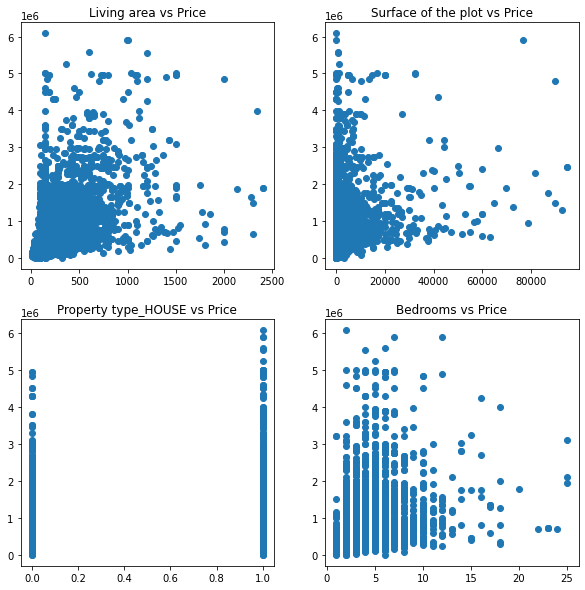

In [181]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].scatter(df['Living area'], df['Price'])
axs[0, 0].set_title('Living area vs Price')
axs[0, 1].scatter(df['Surface of the plot'], df['Price'])
axs[0, 1].set_title('Surface of the plot vs Price')
axs[1, 0].scatter(df['Property type_HOUSE'], df['Price'])
axs[1, 0].set_title('Property type_HOUSE vs Price')
axs[1, 1].scatter(df['Bedrooms'], df['Price'])
axs[1, 1].set_title('Bedrooms vs Price')

### Multiple Linear Regression

#### Multiple Regression with all variables except Post code, Price, Bedrooms

In [6]:
#X = df.drop(df.columns[df.columns.str.contains('Post code')], axis=1, inplace=True)
X = df.loc[:, ~df.columns.str.startswith('Post code_')]
#X = df.drop(df.filter(regex='City').columns, axis=1)
X = X.drop(columns=['Price', 'Bedrooms'])
y = df.Price

X

,Building condition,Kitchen type,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,property sub-type_BUNGALOW,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,4.0,1.0,1,3,1,0.0,63.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
1,4.0,1.0,1,2,1,0.0,42.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
2,4.0,1.0,1,2,1,0.0,42.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
3,4.0,1.0,1,2,1,0.0,150.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,4.0,2.0,0,3,0,0.0,120.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
11876,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
11877,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
11878,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8910, 73)
(2970, 73)
(8910,)
(2970,)


In [43]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.4950070222312539

In [44]:
regressor.score(X_test, y_test)

0.48278786134462315

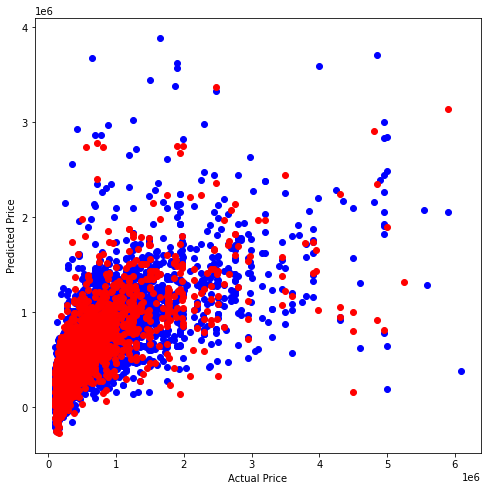

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, regressor.predict(X_train), c='blue')
plt.scatter(y_test, regressor.predict(X_test), c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Polynomial Regression

In [32]:
degree = 2

In [33]:
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [34]:
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [35]:
polyreg.predict(X_test)

array([244594.46104332, 134298.65897842, 955281.85181042, ...,
       169202.7394767 , 254178.21236589, 810240.8595595 ])

In [36]:
polyreg.score(X_train, y_train)

0.7003011074473483

In [37]:
polyreg.score(X_test, y_test)

0.17258258793257852

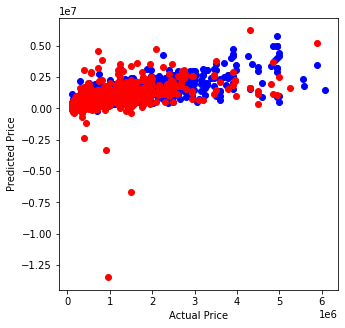

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, polyreg.predict(X_train), c='blue')
plt.scatter(y_test, polyreg.predict(X_test), c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Rough Work

In [4]:
df.corr()

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Property type_APARTMENT,...,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label
Price,1.000000,0.147350,0.137699,0.327389,-0.038973,0.202133,-0.013529,0.357749,0.451236,-0.283683,...,-0.005737,0.002245,-0.004314,0.008822,0.000855,-0.004254,0.000074,0.013519,0.107680,0.081931
Building condition,0.147350,1.000000,0.418931,0.016042,0.085307,0.004284,-0.234743,-0.007636,0.019676,0.039544,...,-0.009929,0.011855,-0.014043,0.011855,-0.009929,0.001034,-0.009929,-0.006244,0.273711,0.096821
Kitchen type,0.137699,0.418931,1.000000,0.032794,0.018881,0.042647,-0.191772,-0.002994,0.037809,-0.006068,...,-0.009598,0.014315,-0.005119,0.002359,-0.009598,0.011073,0.002359,-0.019198,0.333842,0.147178
Bedrooms,0.327389,0.016042,0.032794,1.000000,-0.024434,0.165322,0.038410,0.140322,0.380233,-0.342999,...,-0.006809,0.002911,-0.002756,-0.000329,-0.000329,-0.004310,-0.000329,0.005822,0.029586,0.106498
Furnished,-0.038973,0.085307,0.018881,-0.024434,1.000000,-0.076414,-0.090736,-0.016879,-0.048754,0.097399,...,-0.001928,-0.001928,-0.002726,-0.001928,-0.001928,-0.009050,-0.001928,-0.003856,-0.010796,-0.032814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Post code_9990,-0.004254,0.001034,0.011073,-0.004310,-0.009050,0.004861,-0.015776,0.000662,-0.003862,-0.008341,...,-0.000384,-0.000384,-0.000544,-0.000384,-0.000384,1.000000,-0.000384,-0.000769,-0.010943,-0.005757
Post code_9991,0.000074,-0.009929,0.002359,-0.000329,-0.001928,0.011552,0.005736,-0.000444,0.001954,-0.009182,...,-0.000082,-0.000082,-0.000116,-0.000082,-0.000082,-0.000384,1.000000,-0.000164,0.007676,-0.005765
Post code_9992,0.013519,-0.006244,-0.019198,0.005822,-0.003856,0.011538,0.001466,0.003493,0.005351,-0.018366,...,-0.000164,-0.000164,-0.000232,-0.000164,-0.000164,-0.000769,-0.000164,1.000000,-0.002995,0.018429
Terrace_Combined,0.107680,0.273711,0.333842,0.029586,-0.010796,0.056260,-0.138915,-0.016978,0.025650,0.005820,...,0.007676,0.007676,-0.002117,0.007676,0.007676,-0.010943,0.007676,-0.002995,1.000000,0.142819


#### Multiple Regression with all variables except City

In [219]:
#X = df.drop(df.columns[df.columns.str.contains('Post code')], axis=1, inplace=True)
#X = df.loc[:, ~df.columns.str.contains('^City', case=True)]
X = df.drop(df.filter(regex='City').columns, axis=1)
X = X.drop(columns=['Price', 'Bedrooms'])
y = df.Price

X

,Building condition,Kitchen type,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,property sub-type_BUNGALOW,...,Post code_9970,Post code_9971,Post code_9981,Post code_9982,Post code_9988,Post code_9990,Post code_9991,Post code_9992,Terrace_Combined,garden_label
0,4.0,1.0,1,3,1,0.0,63.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
1,4.0,1.0,1,2,1,0.0,42.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
2,4.0,1.0,1,2,1,0.0,42.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
3,4.0,1.0,1,2,1,0.0,150.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,4.0,2.0,0,3,0,0.0,120.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
11876,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
11877,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
11878,6.0,0.0,0,3,1,0.0,95.0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0


In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8910, 2)
(2970, 2)
(8910,)
(2970,)


In [243]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.36926516715738733

In [244]:
regressor.score(X_test, y_test)

0.32107325508894824

#### Multiple Linear Regression with highest influential variables

In [230]:
x_1 = df['Living area'].to_numpy()
x_2 = df['Surface of the plot'].to_numpy()
#x_3 = df['Bedrooms'].to_numpy()
#x_4 = df['Property type_HOUSE'].to_numpy()

#x_5 = df['Property type_APARTMENT'].to_numpy()
#x_6 = df['property sub-type_FLAT_STUDIO'].to_numpy()
#x_7 = df['property sub-type_GROUND_FLOOR'].to_numpy()
y = df.Price.to_numpy()

#X = x_1
#X = np.column_stack((x_1, x_2, x_3, x_4, x_5, x_6, x_7))
#X = np.column_stack((x_1, x_2, x_4, x_5, x_6, x_7))
X = np.column_stack((x_1, x_2))

print(X.shape)
print(y.shape)

(11880, 2)
(11880,)


In [22]:
#plt.scatter(X, y)
#plt.show()

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8910, 2)
(2970, 2)
(8910,)
(2970,)


ValueError: x and y must be the same size

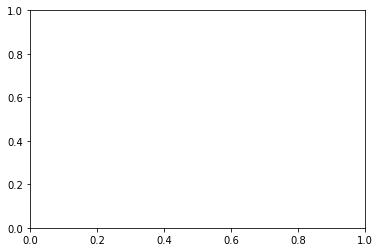

In [232]:
plt.figure()
plt.scatter(X_train, y_train)

In [233]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.352448883089038

In [234]:
regressor.score(X_test, y_test)

0.374624952413666

### Create a class/function to do backward selection

https://www.youtube.com/watch?v=Nv6e9S8fwzA

https://towardsdatascience.com/multiple-linear-regression-8cf3bee21d8b

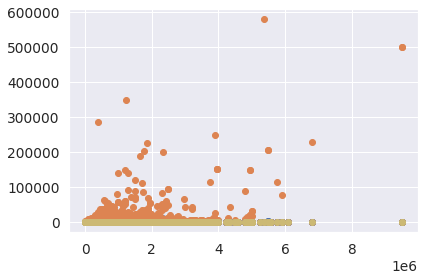

In [34]:
for i in df_key.columns:
    if i == 'Price':
        continue
    plt.scatter(df_key.Price, df_key[i])

plt.tight_layout()
plt.show()

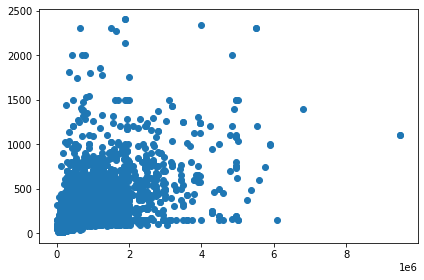

In [43]:
plt.scatter(df.Price, df['Living area'])

plt.tight_layout()
plt.show()

In [ ]:
x_1 = 

In [26]:
X = df_key.drop(columns=['Price']).to_numpy().reshape(-1,1)
y = df_key.Price.to_numpy()

In [21]:
X

,Living area,Surface of the plot,Bedrooms,Property type_HOUSE,property sub-type_CASTLE,property sub-type_VILLA,Number of frontages,property sub-type_EXCEPTIONAL_PROPERTY,Post code_8300
0,63.0,0.0,1,0,0,0,3,0,0
1,42.0,0.0,1,0,0,0,2,0,0
2,42.0,0.0,1,0,0,0,2,0,0
3,150.0,0.0,3,0,0,0,2,0,0
4,120.0,0.0,2,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...
12206,95.0,0.0,1,0,0,0,3,0,0
12207,95.0,0.0,1,0,0,0,3,0,0
12208,95.0,0.0,2,0,0,0,3,0,0
12209,1500.0,0.0,30,0,0,0,3,0,0


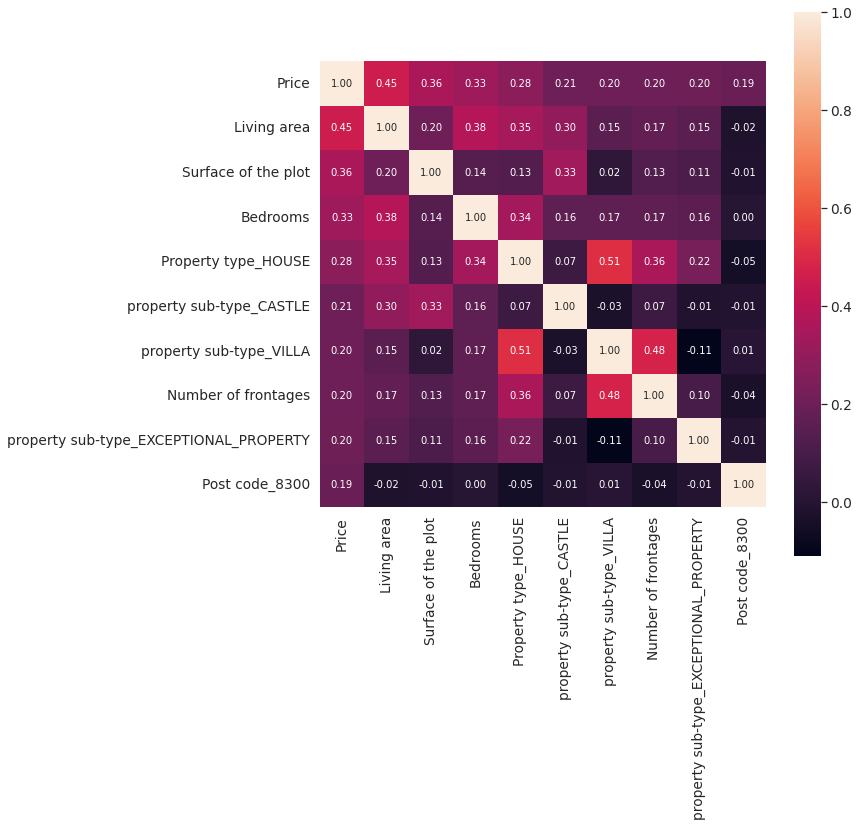

In [10]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

## To be removed

####  Create a smaller dataframe with most influential variables and target

In [29]:
df_key = df[['Price', 'Living area', 'Surface of the plot', 'Bedrooms', 'Property type_HOUSE', 
             'property sub-type_CASTLE', 'property sub-type_VILLA', 'Number of frontages', 
             'property sub-type_EXCEPTIONAL_PROPERTY', 'Post code_8300']]

df_key

,Price,Living area,Surface of the plot,Bedrooms,Property type_HOUSE,property sub-type_CASTLE,property sub-type_VILLA,Number of frontages,property sub-type_EXCEPTIONAL_PROPERTY,Post code_8300
0,179000.0,63.0,0.0,1,0,0,0,3,0,0
1,255000.0,42.0,0.0,1,0,0,0,2,0,0
2,255000.0,42.0,0.0,1,0,0,0,2,0,0
3,620000.0,150.0,0.0,3,0,0,0,2,0,0
4,379000.0,120.0,0.0,2,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
12206,132000.0,95.0,0.0,1,0,0,0,3,0,0
12207,177000.0,95.0,0.0,1,0,0,0,3,0,0
12208,190000.0,95.0,0.0,2,0,0,0,3,0,0
12209,1350000.0,1500.0,0.0,30,0,0,0,3,0,0


In [49]:
df_key['Living area'].corr(df_key['Price'])

0.4512357721484928